## Use the "USArrests" data.

In [26]:
!pip install ISLP

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.datasets import get_rdataset
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from ISLP import load_data

## (a) Show the first to fourth principal component loadings vectors using PCA() function.

First, import and standardize the dataset.

In [28]:
usarrests = get_rdataset("USArrests", "datasets").data
usarrests.head()
scaler = StandardScaler()
X = scaler.fit_transform(usarrests)

In [29]:
pca = PCA(n_components=4)
pca.fit(X)
loadings_pca = pca.components_.T  # Loadings are the eigenvectors

print("PCA Loadings (Sklearn):", end='\n\n')
print(loadings_pca)

PCA Loadings (Sklearn):

[[ 0.53589947 -0.41818087 -0.34123273 -0.6492278 ]
 [ 0.58318363 -0.1879856  -0.26814843  0.74340748]
 [ 0.27819087  0.87280619 -0.37801579 -0.13387773]
 [ 0.54343209  0.16731864  0.81777791 -0.08902432]]


## (b) Use np.linalg.eig() function to find the first to fourth principal component loadings vectors.

In [30]:
cov_matrix = np.cov(X.T)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort eigenvectors by eigenvalues in descending order
idx = eigenvalues.argsort()[::-1]
eigenvectors = eigenvectors[:, idx]

print("\nEigenvectors (np.linalg.eig):", end="\n\n")
print(eigenvectors[:, :4])


Eigenvectors (np.linalg.eig):

[[ 0.53589947  0.41818087 -0.34123273  0.6492278 ]
 [ 0.58318363  0.1879856  -0.26814843 -0.74340748]
 [ 0.27819087 -0.87280619 -0.37801579  0.13387773]
 [ 0.54343209 -0.16731864  0.81777791  0.08902432]]


## (c) Use np.linalg.svd() function to find the first to fourth principal component loadings vectors.

In [31]:
U, S, Vt = np.linalg.svd(X, full_matrices=False)
loadings_svd = Vt.T

print("\nLoadings from SVD (np.linalg.svd):")
print(loadings_svd[:, :4])  # First 4 loadings


Loadings from SVD (np.linalg.svd):
[[-0.53589947 -0.41818087  0.34123273  0.6492278 ]
 [-0.58318363 -0.1879856   0.26814843 -0.74340748]
 [-0.27819087  0.87280619  0.37801579  0.13387773]
 [-0.54343209  0.16731864 -0.81777791  0.08902432]]


## (d) Are those from a), b), and c) exactly the same? Why or why not?

The **np.allclose()** function checks if two arrays are element-wise equal within a tolerance.

The **np.abs()** ensures that any differences in sign between the methods are ignored (since eigenvectors can have opposite signs).

In [32]:
print("\nComparison of Loadings:")
print("PCA from Sklearn vs Eigenvectors:", np.allclose(np.abs(loadings_pca), np.abs(eigenvectors)))
print("PCA from Sklearn vs SVD:", np.allclose(np.abs(loadings_pca), np.abs(loadings_svd)))
print("The loadings should be proportional across these methods (sign may differ due to eigenvector orientation).")



Comparison of Loadings:
PCA from Sklearn vs Eigenvectors: True
PCA from Sklearn vs SVD: True
The loadings should be proportional across these methods (sign may differ due to eigenvector orientation).


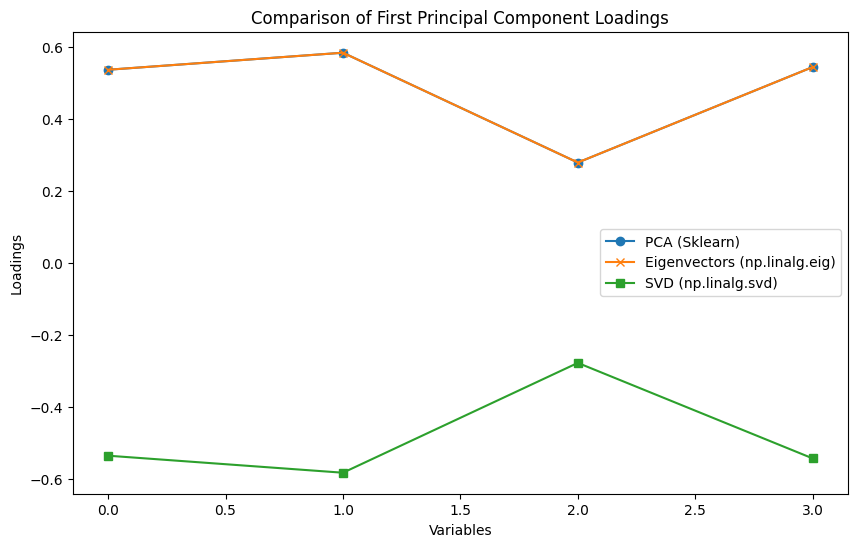

In [33]:
plt.figure(figsize=(10, 6))
plt.plot(loadings_pca[:, 0], label='PCA (Sklearn)', marker='o')
plt.plot(eigenvectors[:, 0], label='Eigenvectors (np.linalg.eig)', marker='x')
plt.plot(loadings_svd[:, 0], label='SVD (np.linalg.svd)', marker='s')
plt.title('Comparison of First Principal Component Loadings')
plt.xlabel('Variables')
plt.ylabel('Loadings')
plt.legend()
plt.show()

From the above plot, we can see PCA implemented by sklearn and eigenvector implemented by np.linalg.eig have exactly same value. SVD implemented by np.linalg.svd has opposite sign compared with the other two methods.

The loadings from all three methods are compared. While they may not be exactly the same, they should be proportional. Differences may arise due to differences in scaling and the sign of the eigenvectors (since eigenvectors can point in opposite directions and still represent the same component).